In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
trip = pd.read_csv("data/trip.csv")

In [3]:
weather = pd.read_csv("data/weather.csv")

In [4]:
station = pd.read_csv("data/station.csv")

In [5]:
trip.shape

(669959, 11)

In [6]:
weather.shape

(3665, 24)

In [7]:
station.shape

(70, 7)

In [8]:
trip.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [9]:
trip.dtypes

id                     int64
duration               int64
start_date            object
start_station_name    object
start_station_id       int64
end_date              object
end_station_name      object
end_station_id         int64
bike_id                int64
subscription_type     object
zip_code              object
dtype: object

In [10]:
weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107


In [11]:
weather.dtypes

date                               object
max_temperature_f                 float64
mean_temperature_f                float64
min_temperature_f                 float64
max_dew_point_f                   float64
mean_dew_point_f                  float64
min_dew_point_f                   float64
max_humidity                      float64
mean_humidity                     float64
min_humidity                      float64
max_sea_level_pressure_inches     float64
mean_sea_level_pressure_inches    float64
min_sea_level_pressure_inches     float64
max_visibility_miles              float64
mean_visibility_miles             float64
min_visibility_miles              float64
max_wind_Speed_mph                float64
mean_wind_speed_mph               float64
max_gust_speed_mph                float64
precipitation_inches               object
cloud_cover                       float64
events                             object
wind_dir_degrees                  float64
zip_code                          

In [12]:
station.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [13]:
station.dtypes

id                     int64
name                  object
lat                  float64
long                 float64
dock_count             int64
city                  object
installation_date     object
dtype: object

In [14]:
trip['subscription_type'].unique()

array(['Subscriber', 'Customer'], dtype=object)

In [15]:
len(trip['duration'][trip['subscription_type'] == 'Customer'])

103213

In [16]:
len(trip['duration'][trip['subscription_type'] == 'Subscriber'])

566746

In [17]:
subscription_nos = []
subscription = []
for x in trip['subscription_type'].unique() :
    subscription.append(x)
    subscription_nos.append(len(trip['duration'][trip['subscription_type'] == x]))

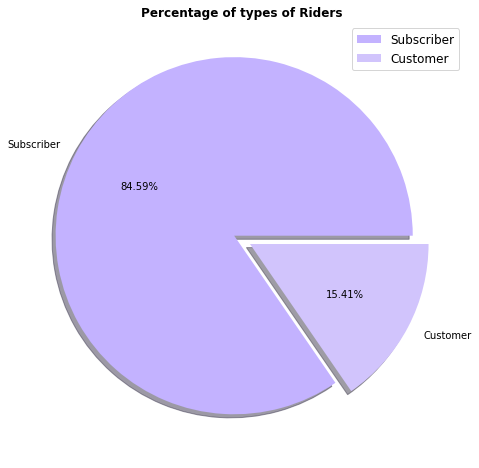

In [18]:
plt.figure(figsize=(8,8))
plt.axis('equal')
plt.title('Percentage of types of Riders', fontsize='large', fontweight='bold')
plt.pie(subscription_nos, labels=subscription, autopct='%0.2f%%', colors=['#c3b2ff','#d1c4fc'], shadow=True, explode=[0.05,0.05])
plt.legend(subscription, fontsize='large')
plt.show()

In [19]:
trip.start_date = pd.to_datetime(trip.start_date)

In [20]:
trip.end_date = pd.to_datetime(trip.end_date)

In [21]:
trip.start_date.dtypes

dtype('<M8[ns]')

In [22]:
trip['weekday'] = trip['start_date'].dt.dayofweek

In [23]:
trip['weekday'].unique()

array([3, 4, 5, 6, 0, 1, 2])

In [24]:
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
# trip['weekday'] = trip['weekday'].map(dayOfWeek)

In [28]:
dayofweek_tripnos = dict(trip['weekday'].value_counts())
dayofweek_tripnos

{0: 115873, 1: 122259, 2: 120201, 3: 119089, 4: 109361, 5: 44785, 6: 38391}

In [29]:
list(dayofweek_tripnos.keys())

[0, 1, 2, 3, 4, 5, 6]

In [30]:
list(dayofweek_tripnos.values())

[115873, 122259, 120201, 119089, 109361, 44785, 38391]

In [31]:
day_names = ['Monday', 'Tuesday', 'Wednessday','Thursday','Friday','Saturday','Sunday']

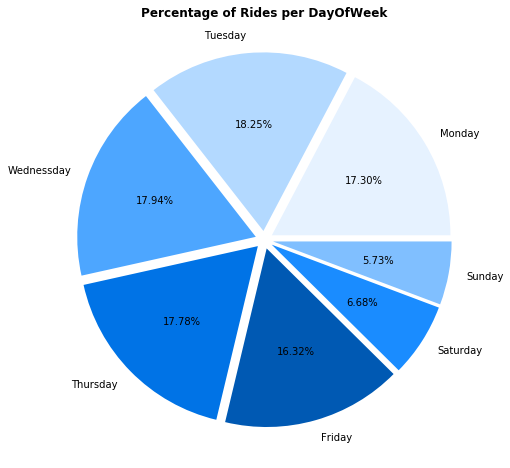

In [32]:
plt.figure(figsize=(8,8))
plt.axis('equal')
plt.title('Percentage of Rides per DayOfWeek', fontsize='large', fontweight='bold')
plt.pie(list(dayofweek_tripnos.values()), labels=day_names, autopct='%0.2f%%', colors=['#e6f2ff','#b3d9ff','#4da6ff','#0073e6','#0059b3','#1a8cff','#80bfff'], explode=[0.05,0.05,0.05,0.05,0.05,0.05,0.05])
# plt.legend(list(dayofweek_tripnos.keys()), fontsize='large')
plt.show()

In [34]:
dict(trip['weekday'][trip['subscription_type'] == 'Customer'].value_counts())

{0: 11469, 1: 11040, 2: 11495, 3: 12451, 4: 14946, 5: 22125, 6: 19687}

In [35]:
dict(trip['weekday'][trip['subscription_type'] == 'Subscriber'].value_counts())

{0: 104404, 1: 111219, 2: 108706, 3: 106638, 4: 94415, 5: 22660, 6: 18704}

In [36]:
tot = list(dayofweek_tripnos.values())
subs = list(dict(trip['weekday'][trip['subscription_type'] == 'Subscriber'].value_counts()).values())
cust = list(dict(trip['weekday'][trip['subscription_type'] == 'Customer'].value_counts()).values())
print(tot,"\n---------------------------\n",subs,"\n---------------------------\n",cust)

[115873, 122259, 120201, 119089, 109361, 44785, 38391] 
---------------------------
 [104404, 111219, 108706, 106638, 94415, 22660, 18704] 
---------------------------
 [11469, 11040, 11495, 12451, 14946, 22125, 19687]


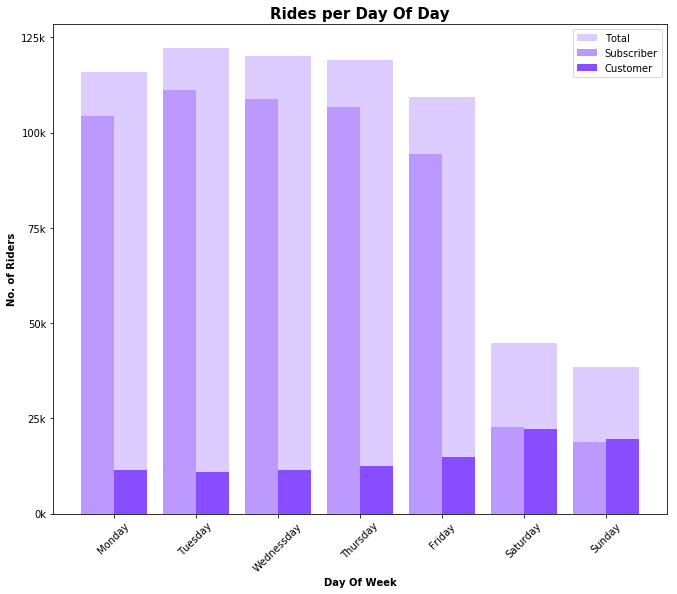

In [41]:
xpos = np.arange(len(day_names))
plt.figure(figsize=(11,9))
plt.xticks(xpos, day_names, rotation=45)
plt.yticks([0,25000,50000,75000,100000,125000],['0k','25k', '50k','75k','100k', '125k'])
plt.xlabel('Day Of Week', fontweight='bold')
plt.ylabel('No. of Riders', fontweight='bold')
plt.title('Rides per Day Of Day', fontweight='bold',fontsize=15)
plt.bar(xpos, tot, label='Total', color='#ddccff')
plt.bar(xpos-0.2, subs, width=0.4, label='Subscriber', color='#bb99ff')
plt.bar(xpos+0.2, cust, width=0.4, label='Customer', color='#884dff')
plt.legend()
plt.show()

In [49]:
duration_weekday = []
for i in range(7):
    duration_weekday.append(trip['duration'][trip['weekday'] == i].mean()/60)
duration_weekday

[14.216483851573129,
 13.534880322375722,
 13.896799804771453,
 14.571864180011028,
 17.571229841229201,
 46.906951360202449,
 42.749313641217995]

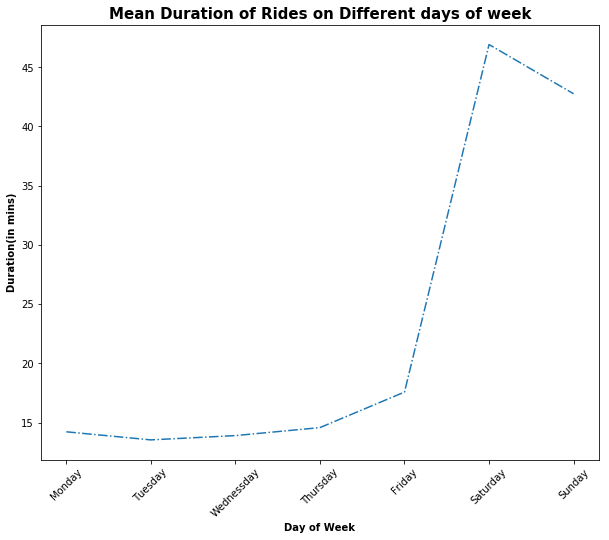

In [57]:
xpos = np.arange(len(day_names))
plt.figure(figsize=(10,8))
plt.title("Mean Duration of Rides on Different days of week", fontweight='bold',fontsize=15)
plt.xticks(xpos, day_names, rotation=45)
plt.xlabel("Day of Week", fontweight='bold')
plt.ylabel("Duration(in mins)", fontweight='bold')
plt.plot(xpos, duration_weekday, linestyle='-.')
plt.show()

In [52]:
duration_subscritiontype = {}
for i in trip['subscription_type'].unique():
    duration_subscritiontype[i] = trip['duration'][trip['subscription_type'] == i].mean()/60
duration_subscritiontype

{'Customer': 65.862688808580316, 'Subscriber': 9.8341476016887039}

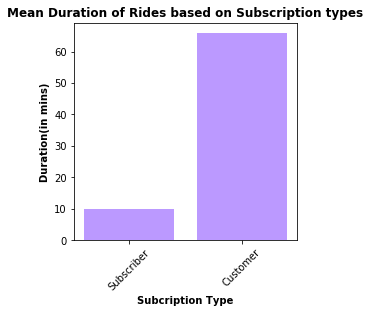

In [58]:
xpos = np.arange(len(list(duration_subscritiontype.keys())))
plt.figure(figsize=(4,4))
plt.title("Mean Duration of Rides based on Subscription types", fontweight='bold')
plt.xticks(xpos, trip['subscription_type'].unique(), rotation=45)
plt.xlabel("Subcription Type", fontweight='bold')
plt.ylabel("Duration(in mins)", fontweight='bold')
plt.bar(xpos, list(duration_subscritiontype.values()), color='#bb99ff')
plt.show()